In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker
import IPython.display

plt.rcParams['font.family'] = ["D2Coding"]

NOTEBOOK_ID = "TEST"
OUTPUT_PATH = f"out/{NOTEBOOK_ID}/"

if not os.path.isdir(OUTPUT_PATH):
    os.mkdir(OUTPUT_PATH)

# 구분구적법

$$\lim_{n \to \infty} \sum_{k=1}^{n}{f(a+k\Delta{x})}{\Delta{x}}=\int_{a}^{b}{f(x)dx}\quad(\Delta x = \frac{b-a}{n})$$

$$\int^{4}_{0}{f(x)dx}$$

In [2]:
def riemann_sum(x, f, mode=0, ret_all=False):
    """
    :param x: [a, b]
    :param f: [a, b] -> R
    :param mode: 0: left, 1: right, 2: midpoint, 3: trapezoid
    :param ret_all: return all property
    :return:
    """

    n = len(x)
    a, b = x[0], x[-1]

    if mode == 0:
        y = np.array([f(x[i]) for i in range(n - 1)])
    elif mode == 1:
        y = np.array([f(x[i]) for i in range(1, n)])
    elif mode == 2:
        y = np.array([f((x[i] + x[i + 1]) / 2) for i in range(n - 1)])
    elif mode == 3:
        y = np.array([1 / 2 * (f(x[i]) + f(x[i + 1])) for i in range(n - 1)])
    if ret_all:
        return np.sum(y * np.diff(x)), y, np.diff(x)
    return np.sum(y * np.diff(x))



In [3]:
x, X = np.linspace(0, 4, 25), np.linspace(0, 4, 10000)
f = lambda x: abs((x - 1) * (x - 3) * x + 1)
Y = np.array([f(k) for k in X])

mids = (x[:-1] + x[1:]) / 2
S, y, w = riemann_sum(x, f, mode=1, ret_all=True)

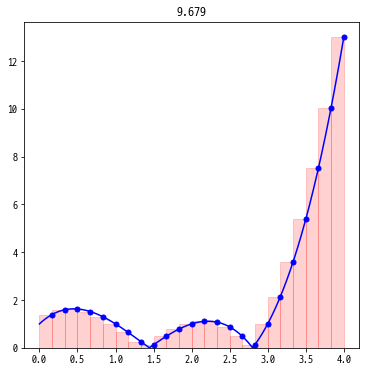

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.bar(mids, y, width=w, alpha=0.18, edgecolor='red', color='red')
ax.plot(X, Y, color='blue')
ax.plot(x[1:], y, 'b.', markersize=10)

ax.set_title(f"{round(S, 4)}")

plt.show()

# 중적분

$$\lim_{n\to\infty}\lim_{m\to\infty}{\sum^{n}_{i=1}{\sum^{m}_{j=1}f(a + i\Delta x, b + j\Delta y)\Delta x\Delta y }}=\iint_{A}f(x,y)dxdy$$

$$S = [0, \frac{\pi}{2}]\times[0, \frac{\pi}{2}]$$


$$\iint_{S}{f(x, y)dx dy}$$

In [5]:
def double_riemann_sum(x, y, f, mode=0, ret_all=False, ):
    """
    :param x: [a1, b1]
    :param y: [a2, b2]
    :param f: R*R -> R
    :param mode:
    :param all_ret:
    :return:
    """

    Dxs, Dys = np.diff(x), np.diff(y)
    nx, ny = len(x), len(y)
    
    if mode == 0:  # left
        z = np.array([[f(X[i, j], Y[i, j]) for j in range(ny - 1)] for i in range(nx - 1)])
    elif mode == 1:  # right
        z = np.array([[f(X[i, j], Y[i, j]) for j in range(1, ny)] for i in range(1, nx)])
    elif mode == 2:  # middle
        z = np.array(
            [[f((X[i, j] + X[i + 1, j + 1]) / 2, (Y[i, j] + Y[i + 1, j + 1]) / 2) for j in range(ny - 1)] for i in
             range(nx - 1)])

    DA = np.dot(np.expand_dims(Dxs, axis=1), np.expand_dims(Dys, axis=0))
    S = np.sum(z * DA)

    if ret_all:
        return S, z, Dxs, Dys,

    return S

In [6]:
x, y = np.linspace(0, np.pi/2, 25), np.linspace(0, np.pi/2, 25)
X, Y = np.meshgrid(x, y)
mX, mY = np.meshgrid(x[:-1], y[:-1])

f = lambda x, y: np.sin(x) + np.cos(y)

S, z, dxs, dys = double_riemann_sum(x, y, f, mode=2, ret_all=True)
DX, DY = np.meshgrid(dxs, dys)

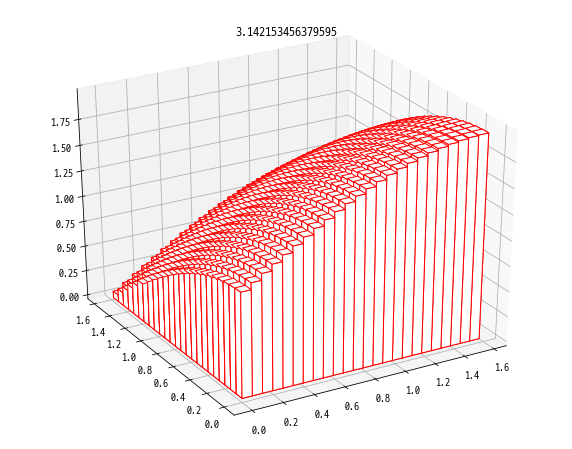

In [17]:
fig ,ax = plt.subplots(figsize=(10, 8) ,subplot_kw = {"projection": '3d'})

ax.bar3d(mX.ravel(), mY.ravel(), np.zeros_like(mY).ravel(), DX.ravel(), DY.ravel(), z.ravel(), fc=(1, 1, 1, 1), edgecolor='red')

ax.set_title(f"{S}")

ax.view_init(30, 240)

plt.show()